In [190]:
import librosa
import librosa.display
import soundfile
import os, glob, pickle
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [163]:
def extract_feature(file_name, mfcc, chroma, mel):
  with soundfile.SoundFile(file_name) as sound_file:
    X = sound_file.read(dtype="float32")
    sample_rate=sound_file.samplerate
    if chroma:
      stft=np.abs(librosa.stft(X))
    result=np.array([])
    if mfcc:
      mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
      result=np.hstack((result, mfccs))
    if chroma:
      chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
      result=np.hstack((result, chroma))
    if mel:
      mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
      result=np.hstack((result, mel))
  return result

In [164]:
import warnings
warnings.filterwarnings("ignore")

In [165]:
emotions = {
  '01': 'anger',
  '02': 'clear',
  '03': 'loud',
  '04': 'neutral',
  '05': 'sad',
}

observed_emotions = ['anger', 'clear', 'loud', 'neutral', 'sad']

In [166]:
x,y=[],[]


In [167]:
le_cls = LabelEncoder()

In [168]:
def load_data(test_size, random_state):
    for file in glob.glob('C:/Users/chinn/Desktop/speech_processing_project_1/paper/speech_train/*.sph'):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[0]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), np.array(y), test_size=test_size, random_state=random_state)

In [169]:
x_train,x_test,y_train,y_test=load_data(test_size=0.3, random_state=9)
x_train, x_val, y_train, y_val = train_test_split(np.array(x_train), y_train, test_size=0.3, random_state=123)

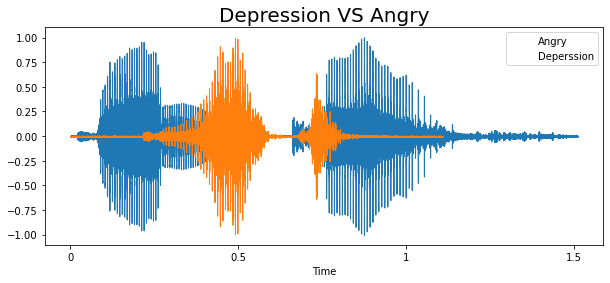

In [271]:
emotion = 'Depression VS Angry'
E1 ='Angry'
E2 = 'Deperssion'
filename='05-slow-16.wav'
filename1='01-angry-02.wav'
data, sampling_rate = librosa.load(filename);
data1, sampling_rate1 = librosa.load(filename1);
plt.figure(figsize=(10,4))
plt.title(emotion, size=20)
librosa.display.waveshow(data, sampling_rate)
librosa.display.waveshow(data1, sampling_rate1)
plt.legend({E1,E2})


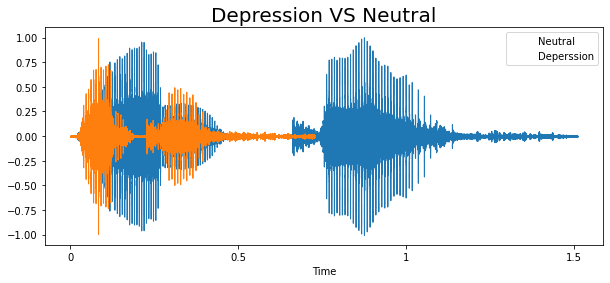

In [273]:
emotion = 'Depression VS Neutral'
E1 ='Neutral'
E2 = 'Deperssion'

filename='05-slow-16.wav'
filename1='04-neutral-16.wav'
data, sampling_rate = librosa.load(filename);
data1, sampling_rate1 = librosa.load(filename1);
plt.figure(figsize=(10,4))
plt.title(emotion, size=20)
librosa.display.waveshow(data, sampling_rate)
librosa.display.waveshow(data1, sampling_rate1)
plt.legend({E1,E2})


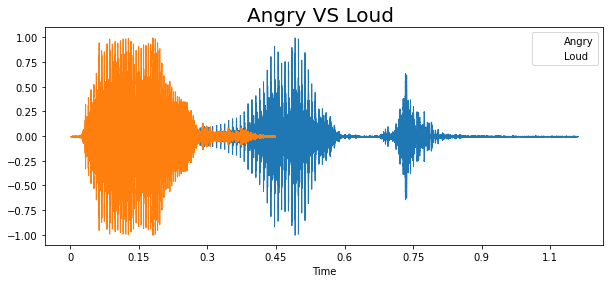

In [274]:
emotion = 'Angry VS Loud '
E1 ='Angry'
E2 = 'Loud'
filename='01-angry-02.wav'
filename1='03-loud-12.wav'
data, sampling_rate = librosa.load(filename);
data1, sampling_rate1 = librosa.load(filename1);
plt.figure(figsize=(10,4))
plt.title(emotion, size=20)
librosa.display.waveshow(data, sampling_rate)
librosa.display.waveshow(data1, sampling_rate1)
plt.legend({E1,E2})


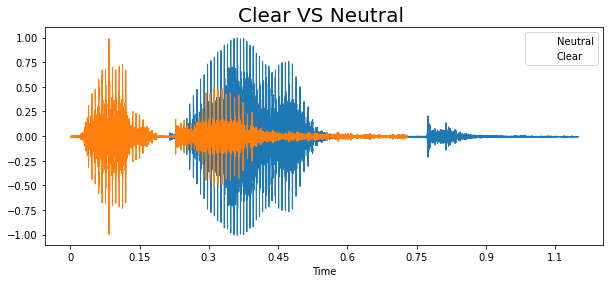

In [275]:
emotion = 'Clear VS Neutral '
E1 = 'Clear'
E2 = 'Neutral'
filename='02-clear-01.wav'
filename1='04-neutral-16.wav'
data, sampling_rate = librosa.load(filename);
data1, sampling_rate1 = librosa.load(filename1);
plt.figure(figsize=(10,4))
plt.title(emotion, size=20)
librosa.display.waveshow(data, sampling_rate)
librosa.display.waveshow(data1, sampling_rate1)
plt.legend({E1,E2})


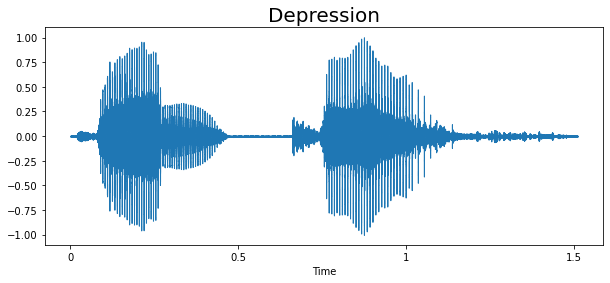

In [276]:
emotion = 'Depression'
filename='05-slow-16.wav'
data, sampling_rate = librosa.load(filename)
plt.figure(figsize=(10,4))
plt.title(emotion, size=20)
librosa.display.waveshow(data, sampling_rate)
Audio(filename)

In [175]:
print((x_train.shape[0], x_test.shape[0]))
print((x_train.shape[1], x_test.shape[1]))

(49, 30)
(180, 180)


In [176]:
np.unique(y_train)

array(['anger', 'clear', 'loud', 'neutral', 'sad'], dtype='<U7')

In [177]:
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [178]:
from sklearn.ensemble import RandomForestClassifier
from  sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [179]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(49, 180)
(49,)
(21, 180)
(21,)


In [180]:
y_train = le_cls.fit_transform(y_train)
y_val = le_cls.fit_transform(y_val)


In [181]:
np.unique(y_train)

array([0, 1, 2, 3, 4], dtype=int64)

In [206]:
rfc = RandomForestClassifier(n_estimators=100)
def training():
    rfc = RandomForestClassifier(n_estimators=100)
    rfc.fit(x_train,y_train)
    return rfc
accuracy = 0
epoach = 0;
while(accuracy != 80):
    model = training()
    y_pred=model.predict(x_val)
    epoach = epoach+1;
    accuracy=accuracy_score(y_true=y_val, y_pred=y_pred)
    accuracy = round(accuracy*100)
    print("No Of Epochs:",epoach,end='\t')
    print("Accracy for Each Epoach  {:.2f}%".format(accuracy))
if(accuracy!=0):
    print("Accuracy: {:.2f}%".format(accuracy))

No Of Epochs: 1	Accracy for Each Epoach  52.00%
No Of Epochs: 2	Accracy for Each Epoach  52.00%
No Of Epochs: 3	Accracy for Each Epoach  71.00%
No Of Epochs: 4	Accracy for Each Epoach  52.00%
No Of Epochs: 5	Accracy for Each Epoach  67.00%
No Of Epochs: 6	Accracy for Each Epoach  62.00%
No Of Epochs: 7	Accracy for Each Epoach  62.00%
No Of Epochs: 8	Accracy for Each Epoach  52.00%
No Of Epochs: 9	Accracy for Each Epoach  62.00%
No Of Epochs: 10	Accracy for Each Epoach  57.00%
No Of Epochs: 11	Accracy for Each Epoach  57.00%
No Of Epochs: 12	Accracy for Each Epoach  57.00%
No Of Epochs: 13	Accracy for Each Epoach  52.00%
No Of Epochs: 14	Accracy for Each Epoach  67.00%
No Of Epochs: 15	Accracy for Each Epoach  62.00%
No Of Epochs: 16	Accracy for Each Epoach  62.00%
No Of Epochs: 17	Accracy for Each Epoach  67.00%
No Of Epochs: 18	Accracy for Each Epoach  48.00%
No Of Epochs: 19	Accracy for Each Epoach  67.00%
No Of Epochs: 20	Accracy for Each Epoach  76.00%
No Of Epochs: 21	Accracy for 

No Of Epochs: 168	Accracy for Each Epoach  67.00%
No Of Epochs: 169	Accracy for Each Epoach  52.00%
No Of Epochs: 170	Accracy for Each Epoach  57.00%
No Of Epochs: 171	Accracy for Each Epoach  62.00%
No Of Epochs: 172	Accracy for Each Epoach  62.00%
No Of Epochs: 173	Accracy for Each Epoach  62.00%
No Of Epochs: 174	Accracy for Each Epoach  57.00%
No Of Epochs: 175	Accracy for Each Epoach  67.00%
No Of Epochs: 176	Accracy for Each Epoach  57.00%
No Of Epochs: 177	Accracy for Each Epoach  62.00%
No Of Epochs: 178	Accracy for Each Epoach  52.00%
No Of Epochs: 179	Accracy for Each Epoach  52.00%
No Of Epochs: 180	Accracy for Each Epoach  57.00%
No Of Epochs: 181	Accracy for Each Epoach  71.00%
No Of Epochs: 182	Accracy for Each Epoach  62.00%
No Of Epochs: 183	Accracy for Each Epoach  67.00%
No Of Epochs: 184	Accracy for Each Epoach  62.00%
No Of Epochs: 185	Accracy for Each Epoach  62.00%
No Of Epochs: 186	Accracy for Each Epoach  67.00%
No Of Epochs: 187	Accracy for Each Epoach  67.00%


No Of Epochs: 332	Accracy for Each Epoach  62.00%
No Of Epochs: 333	Accracy for Each Epoach  62.00%
No Of Epochs: 334	Accracy for Each Epoach  62.00%
No Of Epochs: 335	Accracy for Each Epoach  62.00%
No Of Epochs: 336	Accracy for Each Epoach  57.00%
No Of Epochs: 337	Accracy for Each Epoach  57.00%
No Of Epochs: 338	Accracy for Each Epoach  57.00%
No Of Epochs: 339	Accracy for Each Epoach  43.00%
No Of Epochs: 340	Accracy for Each Epoach  67.00%
No Of Epochs: 341	Accracy for Each Epoach  62.00%
No Of Epochs: 342	Accracy for Each Epoach  62.00%
No Of Epochs: 343	Accracy for Each Epoach  62.00%
No Of Epochs: 344	Accracy for Each Epoach  67.00%
No Of Epochs: 345	Accracy for Each Epoach  52.00%
No Of Epochs: 346	Accracy for Each Epoach  62.00%
No Of Epochs: 347	Accracy for Each Epoach  67.00%
No Of Epochs: 348	Accracy for Each Epoach  57.00%
No Of Epochs: 349	Accracy for Each Epoach  67.00%
No Of Epochs: 350	Accracy for Each Epoach  57.00%
No Of Epochs: 351	Accracy for Each Epoach  57.00%


No Of Epochs: 496	Accracy for Each Epoach  62.00%
No Of Epochs: 497	Accracy for Each Epoach  67.00%
No Of Epochs: 498	Accracy for Each Epoach  48.00%
No Of Epochs: 499	Accracy for Each Epoach  62.00%
No Of Epochs: 500	Accracy for Each Epoach  57.00%
No Of Epochs: 501	Accracy for Each Epoach  62.00%
No Of Epochs: 502	Accracy for Each Epoach  62.00%
No Of Epochs: 503	Accracy for Each Epoach  48.00%
No Of Epochs: 504	Accracy for Each Epoach  52.00%
No Of Epochs: 505	Accracy for Each Epoach  57.00%
No Of Epochs: 506	Accracy for Each Epoach  67.00%
No Of Epochs: 507	Accracy for Each Epoach  57.00%
No Of Epochs: 508	Accracy for Each Epoach  57.00%
No Of Epochs: 509	Accracy for Each Epoach  57.00%
No Of Epochs: 510	Accracy for Each Epoach  57.00%
No Of Epochs: 511	Accracy for Each Epoach  57.00%
No Of Epochs: 512	Accracy for Each Epoach  67.00%
No Of Epochs: 513	Accracy for Each Epoach  57.00%
No Of Epochs: 514	Accracy for Each Epoach  52.00%
No Of Epochs: 515	Accracy for Each Epoach  57.00%


No Of Epochs: 660	Accracy for Each Epoach  62.00%
No Of Epochs: 661	Accracy for Each Epoach  57.00%
No Of Epochs: 662	Accracy for Each Epoach  67.00%
No Of Epochs: 663	Accracy for Each Epoach  57.00%
No Of Epochs: 664	Accracy for Each Epoach  67.00%
No Of Epochs: 665	Accracy for Each Epoach  48.00%
No Of Epochs: 666	Accracy for Each Epoach  57.00%
No Of Epochs: 667	Accracy for Each Epoach  71.00%
No Of Epochs: 668	Accracy for Each Epoach  57.00%
No Of Epochs: 669	Accracy for Each Epoach  62.00%
No Of Epochs: 670	Accracy for Each Epoach  57.00%
No Of Epochs: 671	Accracy for Each Epoach  57.00%
No Of Epochs: 672	Accracy for Each Epoach  67.00%
No Of Epochs: 673	Accracy for Each Epoach  62.00%
No Of Epochs: 674	Accracy for Each Epoach  57.00%
No Of Epochs: 675	Accracy for Each Epoach  67.00%
No Of Epochs: 676	Accracy for Each Epoach  48.00%
No Of Epochs: 677	Accracy for Each Epoach  71.00%
No Of Epochs: 678	Accracy for Each Epoach  52.00%
No Of Epochs: 679	Accracy for Each Epoach  57.00%


No Of Epochs: 824	Accracy for Each Epoach  62.00%
No Of Epochs: 825	Accracy for Each Epoach  52.00%
No Of Epochs: 826	Accracy for Each Epoach  62.00%
No Of Epochs: 827	Accracy for Each Epoach  62.00%
No Of Epochs: 828	Accracy for Each Epoach  57.00%
No Of Epochs: 829	Accracy for Each Epoach  67.00%
No Of Epochs: 830	Accracy for Each Epoach  57.00%
No Of Epochs: 831	Accracy for Each Epoach  62.00%
No Of Epochs: 832	Accracy for Each Epoach  57.00%
No Of Epochs: 833	Accracy for Each Epoach  62.00%
No Of Epochs: 834	Accracy for Each Epoach  57.00%
No Of Epochs: 835	Accracy for Each Epoach  67.00%
No Of Epochs: 836	Accracy for Each Epoach  57.00%
No Of Epochs: 837	Accracy for Each Epoach  57.00%
No Of Epochs: 838	Accracy for Each Epoach  67.00%
No Of Epochs: 839	Accracy for Each Epoach  52.00%
No Of Epochs: 840	Accracy for Each Epoach  62.00%
No Of Epochs: 841	Accracy for Each Epoach  57.00%
No Of Epochs: 842	Accracy for Each Epoach  57.00%
No Of Epochs: 843	Accracy for Each Epoach  57.00%


No Of Epochs: 988	Accracy for Each Epoach  62.00%
No Of Epochs: 989	Accracy for Each Epoach  57.00%
No Of Epochs: 990	Accracy for Each Epoach  52.00%
No Of Epochs: 991	Accracy for Each Epoach  57.00%
No Of Epochs: 992	Accracy for Each Epoach  62.00%
No Of Epochs: 993	Accracy for Each Epoach  57.00%
No Of Epochs: 994	Accracy for Each Epoach  57.00%
No Of Epochs: 995	Accracy for Each Epoach  71.00%
No Of Epochs: 996	Accracy for Each Epoach  62.00%
No Of Epochs: 997	Accracy for Each Epoach  62.00%
No Of Epochs: 998	Accracy for Each Epoach  62.00%
No Of Epochs: 999	Accracy for Each Epoach  62.00%
No Of Epochs: 1000	Accracy for Each Epoach  57.00%
No Of Epochs: 1001	Accracy for Each Epoach  62.00%
No Of Epochs: 1002	Accracy for Each Epoach  62.00%
No Of Epochs: 1003	Accracy for Each Epoach  62.00%
No Of Epochs: 1004	Accracy for Each Epoach  57.00%
No Of Epochs: 1005	Accracy for Each Epoach  57.00%
No Of Epochs: 1006	Accracy for Each Epoach  57.00%
No Of Epochs: 1007	Accracy for Each Epoach 

KeyboardInterrupt: 

In [207]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.33      0.50         3
           2       1.00      0.83      0.91         6
           3       0.33      0.33      0.33         3
           4       0.43      0.60      0.50         5

    accuracy                           0.67        21
   macro avg       0.71      0.62      0.63        21
weighted avg       0.73      0.67      0.67        21



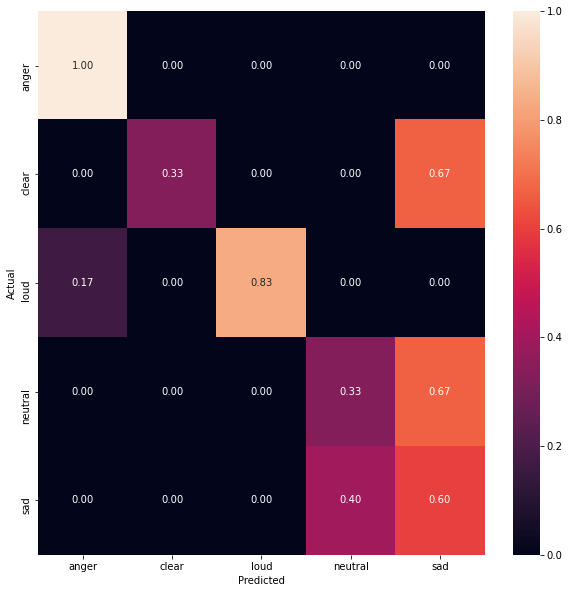

In [212]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns
cm = confusion_matrix(y_true=y_val, y_pred=y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
target_names = ['anger', 'clear', 'loud', 'neutral', 'sad']
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [ ]:
  # Classification Report 
print("Classification Report is shown below")
target_names = ['anger', 'clear', 'loud', 'neutral', 'sad'] 
print(classification_report(data['actual labels'],data['predicted labels']))
  # Confusion matrix
print("Confusion matrix is shown below")
cm=confusion_matrix(data['actual labels'],data['predicted labels'])
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')



# Recurrent Neural Network

In [213]:
import tensorflow as tf

In [214]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Activation,Dense,Flatten,Dropout

In [215]:
model = Sequential()

In [216]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)

In [217]:
x_train.shape

(49, 180, 1)

In [218]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,5)

In [219]:
y_val = to_categorical(y_val,5)

In [258]:
import tensorflow as tf 
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation 
#LSTM layer expects 3D tensor with shape (batch_size, timesteps, input_dim).
model = tf.keras.models.Sequential()
model.add(LSTM(128, return_sequences=False, input_shape=(180,1), kernel_regularizer=tf.keras.regularizers.L1(0.01),
    activity_regularizer=tf.keras.regularizers.L2(0.01))) 
model.add(Dropout(0.5))
model.add(Dense(62,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax')) 
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 62)                7998      
_________________________________________________________________
dropout_7 (Dropout)          (None, 62)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 315       
Total params: 74,873
Trainable params: 74,873
Non-trainable params: 0
_________________________________________________________________


In [259]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [260]:

history = model.fit(x_train, y_train, validation_split=0.1, epochs=200)


Epoch 1/200
2/2 [==============================] - 6s 1s/step - loss: 1.8876 - accuracy: 0.1818 - val_loss: 1.8734 - val_accuracy: 0.2000
Epoch 2/200
2/2 [==============================] - 1s 397ms/step - loss: 1.8572 - accuracy: 0.2500 - val_loss: 1.8411 - val_accuracy: 0.2000
Epoch 3/200
2/2 [==============================] - 1s 381ms/step - loss: 1.8177 - accuracy: 0.2727 - val_loss: 1.7966 - val_accuracy: 0.2000
Epoch 4/200
2/2 [==============================] - 1s 367ms/step - loss: 1.7920 - accuracy: 0.2727 - val_loss: 1.7381 - val_accuracy: 0.2000
Epoch 5/200
2/2 [==============================] - 1s 357ms/step - loss: 1.7619 - accuracy: 0.2727 - val_loss: 1.7033 - val_accuracy: 0.2000
Epoch 6/200
2/2 [==============================] - 1s 391ms/step - loss: 1.6760 - accuracy: 0.2727 - val_loss: 1.7261 - val_accuracy: 0.2000
Epoch 7/200
2/2 [==============================] - 1s 397ms/step - loss: 1.6377 - accuracy: 0.2727 - val_loss: 1.6989 - val_accuracy: 0.2000
Epoch 8/200
2/2 

Epoch 59/200
2/2 [==============================] - 1s 375ms/step - loss: 0.9659 - accuracy: 0.5000 - val_loss: 1.2469 - val_accuracy: 0.4000
Epoch 60/200
2/2 [==============================] - 1s 411ms/step - loss: 1.0011 - accuracy: 0.6136 - val_loss: 1.2704 - val_accuracy: 0.4000
Epoch 61/200
2/2 [==============================] - 1s 355ms/step - loss: 0.9634 - accuracy: 0.5682 - val_loss: 1.3450 - val_accuracy: 0.4000
Epoch 62/200
2/2 [==============================] - 1s 367ms/step - loss: 1.0032 - accuracy: 0.4773 - val_loss: 1.3340 - val_accuracy: 0.2000
Epoch 63/200
2/2 [==============================] - 1s 433ms/step - loss: 0.9640 - accuracy: 0.4545 - val_loss: 1.3193 - val_accuracy: 0.2000
Epoch 64/200
2/2 [==============================] - 1s 384ms/step - loss: 0.9732 - accuracy: 0.5227 - val_loss: 1.3171 - val_accuracy: 0.2000
Epoch 65/200
2/2 [==============================] - 1s 372ms/step - loss: 0.8970 - accuracy: 0.5455 - val_loss: 1.3233 - val_accuracy: 0.4000
Epoch 

2/2 [==============================] - 1s 379ms/step - loss: 0.9046 - accuracy: 0.5682 - val_loss: 1.2999 - val_accuracy: 0.2000
Epoch 117/200
2/2 [==============================] - 1s 383ms/step - loss: 0.8843 - accuracy: 0.5909 - val_loss: 1.2538 - val_accuracy: 0.4000
Epoch 118/200
2/2 [==============================] - 1s 386ms/step - loss: 0.8782 - accuracy: 0.6136 - val_loss: 1.2910 - val_accuracy: 0.4000
Epoch 119/200
2/2 [==============================] - 1s 402ms/step - loss: 0.8731 - accuracy: 0.6364 - val_loss: 1.3615 - val_accuracy: 0.4000
Epoch 120/200
2/2 [==============================] - 1s 374ms/step - loss: 0.8743 - accuracy: 0.5909 - val_loss: 1.3624 - val_accuracy: 0.4000
Epoch 121/200
2/2 [==============================] - 1s 414ms/step - loss: 0.8471 - accuracy: 0.5909 - val_loss: 1.3816 - val_accuracy: 0.4000
Epoch 122/200
2/2 [==============================] - 1s 375ms/step - loss: 0.8580 - accuracy: 0.5455 - val_loss: 1.3412 - val_accuracy: 0.4000
Epoch 123/200

2/2 [==============================] - 1s 389ms/step - loss: 0.5324 - accuracy: 0.8636 - val_loss: 1.4725 - val_accuracy: 0.4000
Epoch 174/200
2/2 [==============================] - 1s 362ms/step - loss: 0.4960 - accuracy: 0.8636 - val_loss: 1.3886 - val_accuracy: 0.4000
Epoch 175/200
2/2 [==============================] - 1s 376ms/step - loss: 0.5858 - accuracy: 0.7955 - val_loss: 1.4201 - val_accuracy: 0.4000
Epoch 176/200
2/2 [==============================] - 1s 373ms/step - loss: 0.5930 - accuracy: 0.7955 - val_loss: 1.5291 - val_accuracy: 0.4000
Epoch 177/200
2/2 [==============================] - 1s 390ms/step - loss: 0.4951 - accuracy: 0.7955 - val_loss: 1.5715 - val_accuracy: 0.4000
Epoch 178/200
2/2 [==============================] - 1s 390ms/step - loss: 0.4900 - accuracy: 0.8182 - val_loss: 1.4191 - val_accuracy: 0.4000
Epoch 179/200
2/2 [==============================] - 1s 404ms/step - loss: 0.4675 - accuracy: 0.8636 - val_loss: 1.8052 - val_accuracy: 0.2000
Epoch 180/200

In [261]:
x_val.shape

(21, 180, 1)

In [262]:
x_val = x_val.reshape(21,180,1)

In [263]:
y_pred=model.predict(x_val)

In [264]:
y_pred.shape

(21, 5)

In [265]:
matrix = confusion_matrix(y_val.argmax(axis=1), y_pred.argmax(axis=1))

In [266]:
matrix

array([[2, 0, 2, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 2, 4, 0, 0],
       [0, 1, 0, 1, 1],
       [0, 0, 0, 4, 1]], dtype=int64)

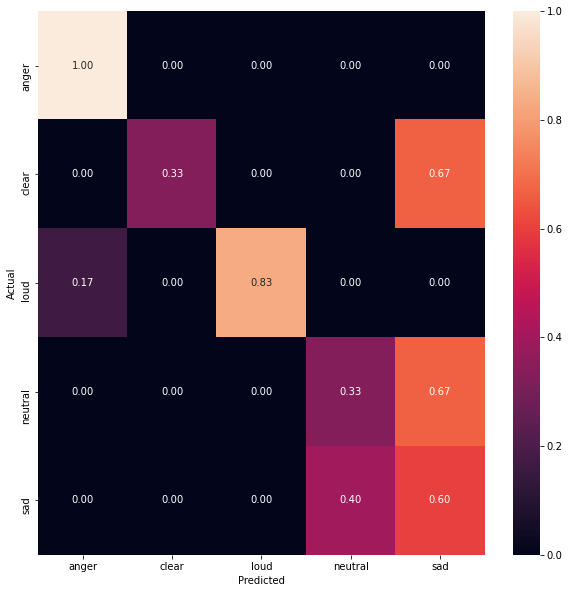

In [267]:
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
target_names = ['anger', 'clear', 'loud', 'neutral', 'sad']
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [268]:
print(classification_report(y_val.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.00      0.00      0.00         3
           2       0.67      0.67      0.67         6
           3       0.12      0.33      0.18         3
           4       0.50      0.20      0.29         5

    accuracy                           0.38        21
   macro avg       0.46      0.34      0.36        21
weighted avg       0.52      0.38      0.41        21



# We also plotted our losses (Train loss and val loss) to see how much error the model possess.

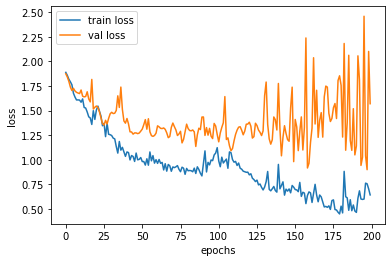

In [269]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(200))
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


# Now we are plotting our accuracy and validation accuracy using pyplot. Accuracy is plotten on y-axis while epochs are plotted at x-axis and we can clearly see that our graph is far from the diagonal and close to y-axis. So we can say that it's a nicely trained model.

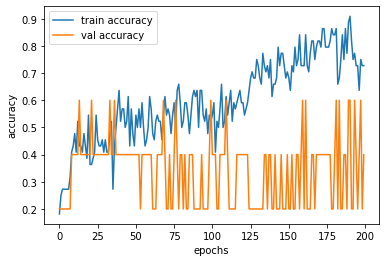

In [270]:
epochs = list(range(200))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()